<a href="https://colab.research.google.com/github/akhil1198/RL-PA3/blob/main/graphs_of_akhilshr_assignment3_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gym torch torchvision numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [ ]:
# takes state info and gives action probabilities of the actions
class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_space, 128)
        self.fc2 = nn.Linear(128, action_space)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1) # -1
        return x

In [ ]:
# gives q values for the two actions in cartpole 
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_space, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
env = gym.make('CartPole-v1')
state_space = env.observation_space.shape[0]
action_space = env.action_space.n

action_space, state_space

(2, 4)

In [ ]:
actor = Actor()
critic = Critic()

In [ ]:
lr = 0.0001 #0.0001
gamma = 0.99 #0.99
lrc = 0.00001
all_reward = []

In [ ]:
optimizer_actor = optim.Adam(actor.parameters(), lr=lr)
optimizer_critic = optim.Adam(critic.parameters(), lr=lrc)

In [ ]:
for i_episode in range(2000):
    state = env.reset()
    # print("----", state)
    done = False
    total_reward = 0
    while not done:
        # nteract with the environment and observe the current state
        state_tensor = torch.from_numpy(state).float().unsqueeze(0)
        # print("Interact with the environment and observe the current state -> ", state_tensor)

        # Select an action using the actor network
        action_probs = actor(state_tensor)
        # print("action_probs from actor network -> ", action_probs)

        action_distribution = torch.distributions.Categorical(action_probs)
        # print("action_distribution from actor network -> ", action_distribution)

        action = action_distribution.sample()
        # print("action from actor network -> ", action)

        # Receive a reward and observe the next state
        next_state, reward, done, _ = env.step(action.item())
        # print("next_state from actor", next_state, "reward from actor", reward)

        # Calculate the TD error
        next_state_tensor = torch.from_numpy(next_state).float().unsqueeze(0)
        # print("calculating TD error next_state_tensor -> ", next_state_tensor)
        with torch.no_grad():
            q_value_next = critic(next_state_tensor)
            # print("q_value_next -> ", q_value_next)

        q_value = critic(state_tensor)
        # print("q_value -> ", q_value)


#  Instead of multiplying the gradient of the log probabilities by Q(s,a), you can calculate the TD error and multiply it with the log probabilities. We have seen some students successfully converge to an optimal policy with this.
        td_error = reward + gamma * q_value_next - q_value
        # print("td_error", td_error)

        # Update the critic network
        optimizer_critic.zero_grad()
        critic_loss = td_error.pow(2).mean() # mse(reward + gamma * q_value_next,  q_value)
        # print("critic_loss critic net -> ", critic_loss)
        critic_loss.backward()
        optimizer_critic.step()

        # Update the actor network
        optimizer_actor.zero_grad()
        actor_loss = action_distribution.log_prob(action) * td_error.detach() #+
        # print("actor_loss actor net -> ", actor_loss)
        actor_loss.backward()
        optimizer_actor.step()

        # Update the state and total reward
        state = next_state
        # print("reward ->> ", reward)
        total_reward += reward
        all_reward.append(total_reward)

    print('Episode {}, Total Reward: {}'.format(i_episode, total_reward))
    print("********************************************")


Episode 0, Total Reward: 9.0
********************************************
Episode 1, Total Reward: 8.0
********************************************
Episode 2, Total Reward: 8.0
********************************************
Episode 3, Total Reward: 11.0
********************************************
Episode 4, Total Reward: 10.0
********************************************
Episode 5, Total Reward: 9.0
********************************************
Episode 6, Total Reward: 10.0
********************************************
Episode 7, Total Reward: 8.0
********************************************
Episode 8, Total Reward: 10.0
********************************************
Episode 9, Total Reward: 12.0
********************************************
Episode 10, Total Reward: 9.0
********************************************
Episode 11, Total Reward: 9.0
********************************************
Episode 12, Total Reward: 10.0
********************************************
Episode 13, Total Reward: 10.

In [ ]:
len(all_reward)

109168

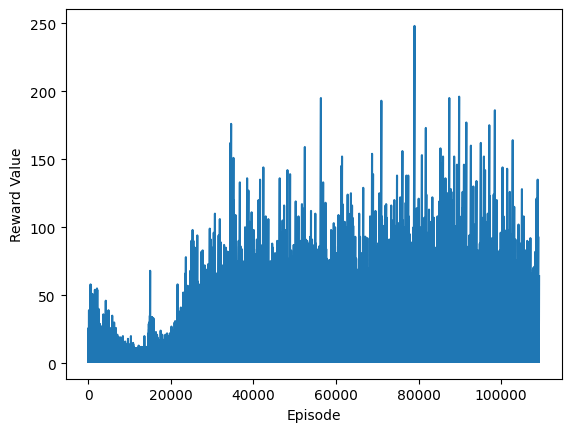

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()

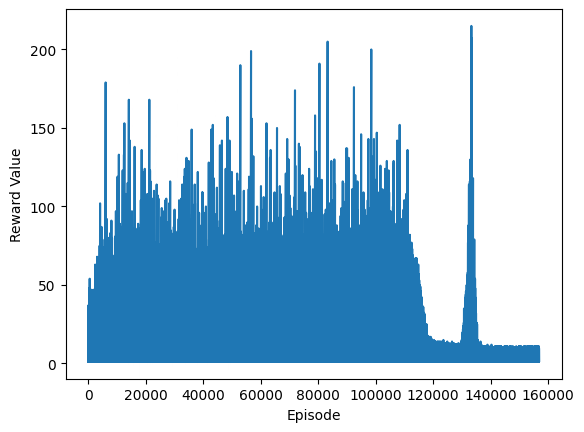

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()

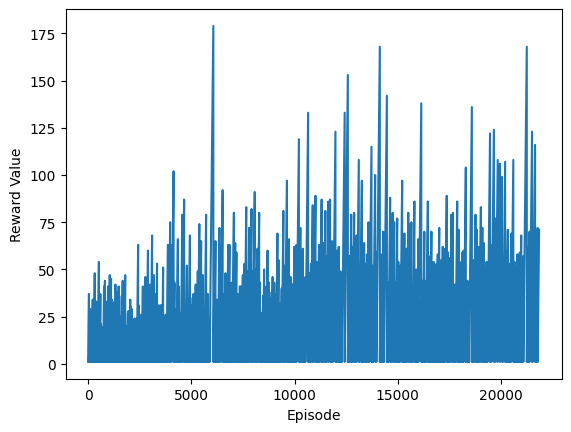

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()

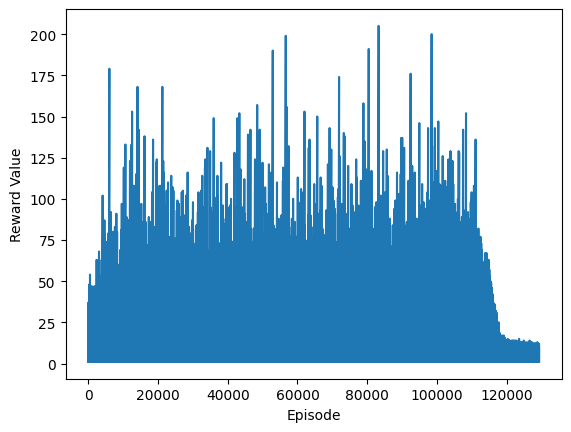

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()

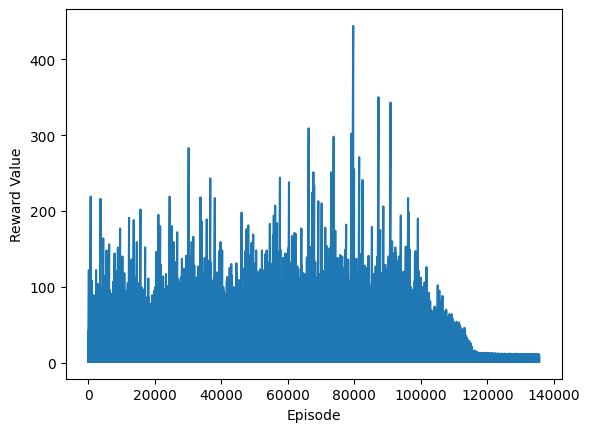

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()

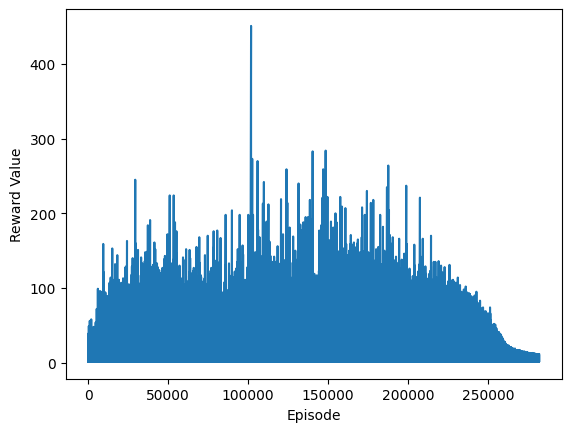

In [ ]:
plt.figure()
plt.plot(all_reward)
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.show()